In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("customer_booking.csv", encoding="latin-1")
X = dataset.iloc[:, [1, 3, 4, 5, 6, 7, 8, 12]]
y = dataset.iloc[:, -1].values

In [3]:
categorical_features = [
    'sales_channel',
    'flight_day',
    'route',
    'booking_origin'
]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, f1_score, accuracy_score
)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
y_test_pred_proba = classifier.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
        
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

In [12]:
print(f"\nTraining Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  F1-Score: {train_f1:.4f}")
        
print(f"\nTest Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  F1-Score: {test_f1:.4f}")
print(f"  ROC-AUC:  {test_auc:.4f}")
        
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No Booking', 'Booking']))


Training Metrics:
  Accuracy: 0.9998
  F1-Score: 0.9992

Test Metrics:
  Accuracy: 0.8457
  F1-Score: 0.2557
  ROC-AUC:  0.7714

Classification Report (Test Set):
              precision    recall  f1-score   support

  No Booking       0.87      0.97      0.91      8487
     Booking       0.47      0.18      0.26      1513

    accuracy                           0.85     10000
   macro avg       0.67      0.57      0.58     10000
weighted avg       0.81      0.85      0.81     10000



In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv_scores = cross_val_score(
            classifier, X_train, y_train, 
            cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
            scoring='roc_auc')
print(f"  ROC-AUC Scores: {cv_scores}")
print(f"  Mean ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")        

  ROC-AUC Scores: [0.75960862 0.76612175 0.76637974 0.76469011 0.75653065]
  Mean ROC-AUC: 0.7627 (+/- 0.0039)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

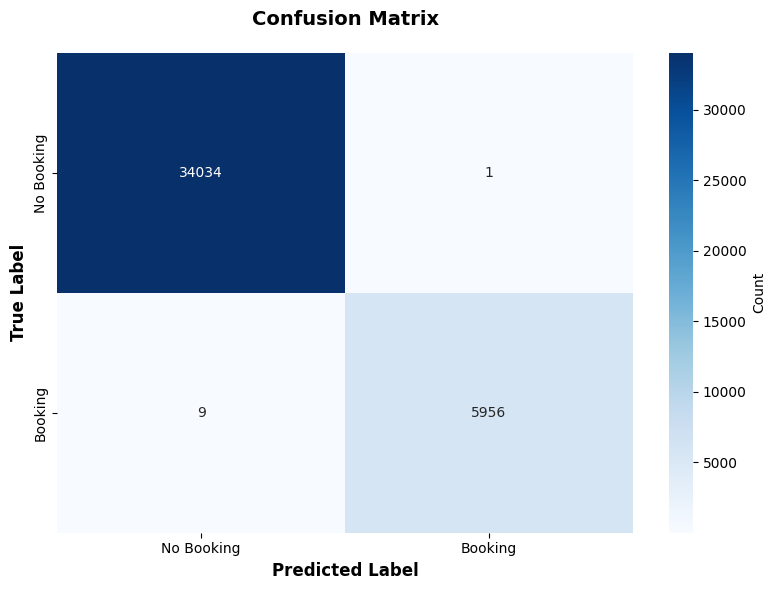

In [15]:
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(8, 6))
    
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=True, cbar_kws={'label': 'Count'},
                xticklabels=['No Booking', 'Booking'],
                yticklabels=['No Booking', 'Booking'])
    
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_title("Confusion Matrix", fontsize=14, fontweight='bold', pad=20)
    
plt.tight_layout()

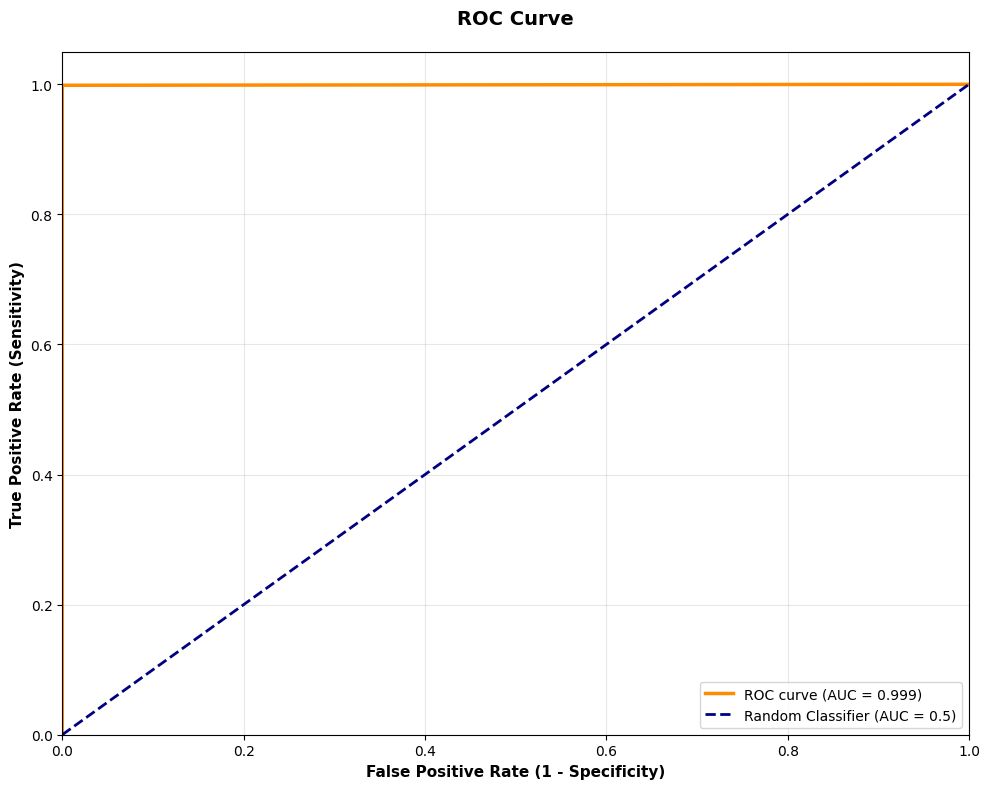

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)
    
fig, ax = plt.subplots(figsize=(10, 8))
    
ax.plot(fpr, tpr, color='darkorange', lw=2.5, 
            label=f'ROC curve (AUC = {roc_auc:.3f})')
    
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
            label='Random Classifier (AUC = 0.5)')
    
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=11, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=11, fontweight='bold')
ax.set_title("ROC Curve", fontsize=14, fontweight='bold', pad=20)
ax.legend(loc="lower right", fontsize=10)
ax.grid(alpha=0.3)
    
plt.tight_layout()
